# **ORDINARY LEAST SQUARE (OLS) REGRESSION**

## **A. Concept**

To find the best fitting straight line/hyperplane that describe the relationship between the predictors (x) and responses (y):

$y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n + \epsilon$

where:
- y: *response variable*
- $x_1,x_2, ..., x_n$: *predictors*
- $\beta_0$: *Intercept*
- $\beta_1, \beta_2, ..., \beta_n$: *Slopes*
- $\epsilon$: *Error term (for noise and randomness)*


In [5]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [62]:
# Constants
# Folder path
FOLDER_PATH = "./data"

### 0. Load the data

In [8]:
# Load the data
data = pd.read_csv(os.path.join(FOLDER_PATH, 'advertising.csv'))
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Text(0.5, 1.0, 'Newspaper vs Sales')

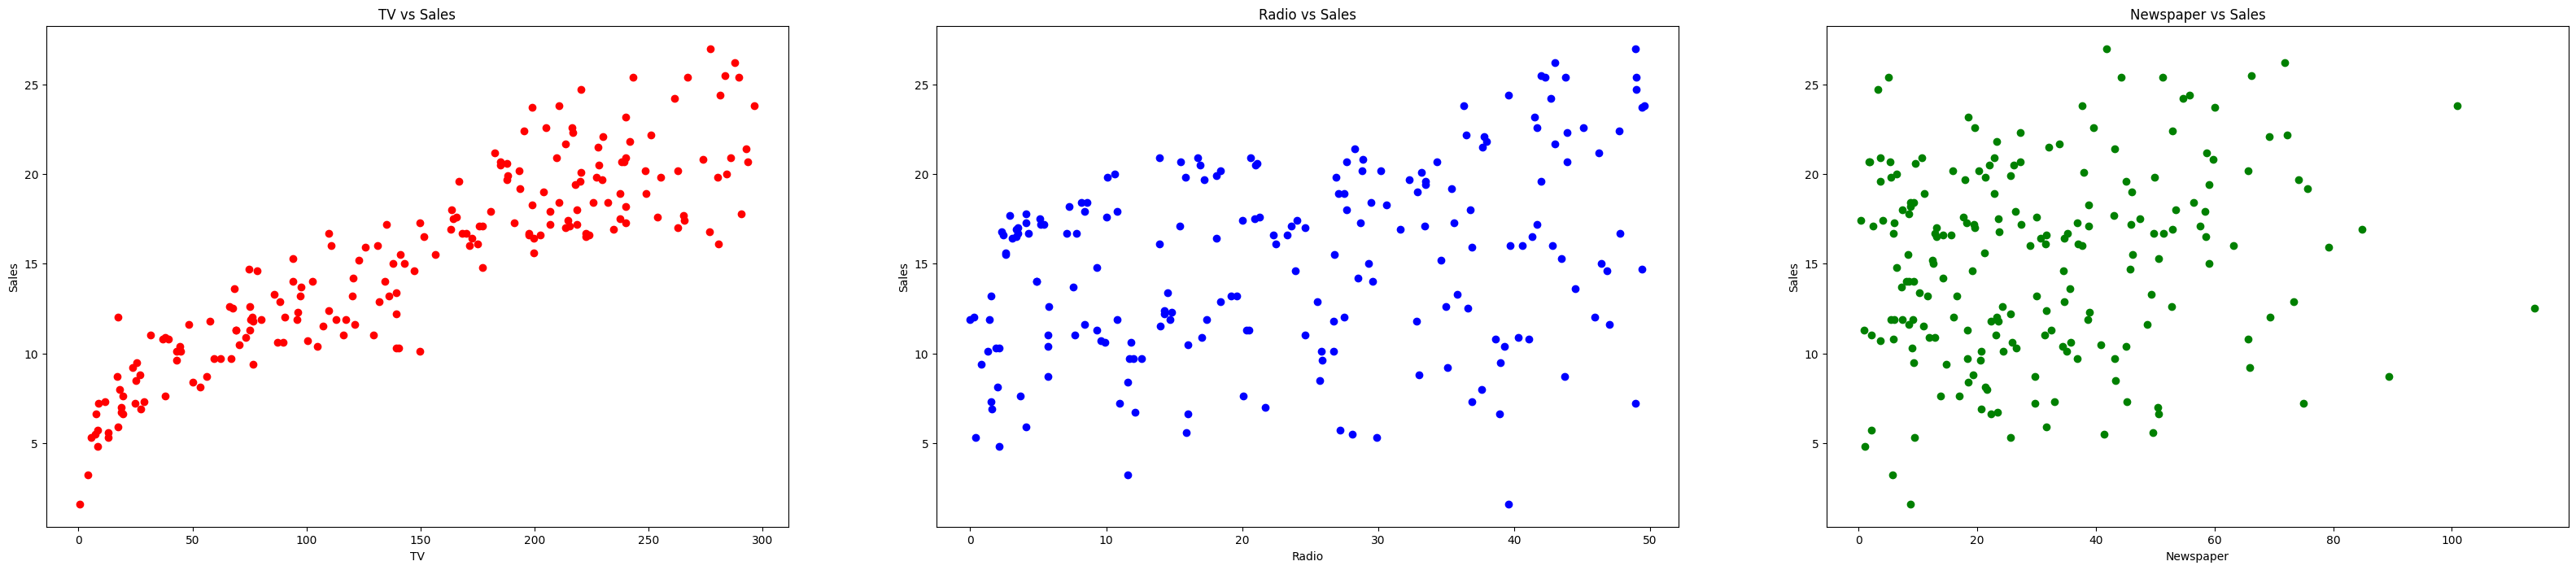

In [61]:
# Split the data
X = data.iloc[:, :-1].values # Select all rows and columns except the last column
y = data.iloc[:, -1].values # Select all rows of the last column

# Plot the data
plt.figure(figsize=(40, 8))

# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], y, color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title(f'TV vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], y, color='blue')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title(f'Radio vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], y, color='green')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title(f'Newspaper vs Sales')

### 1. Model Fitting

#### 1.1. Add intercept column of ones at the beginning of matrix X

In [ ]:
X = np.c_[np.ones(X.shape[0]), X] if X.shape[1] == 3 else X
X[:5]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

#### 1.2. Estimate $\beta_0, \beta_1, ..., \beta_n$ by solving: 

$\hat{\beta} = (X^T X)^{-1} X^T y$

In [ ]:
# Calculate the beta_hat
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat

array([4.62512408e+00, 5.44457803e-02, 1.07001228e-01, 3.35657922e-04])

In [41]:
# Display the results
print(f'The model is: y = {beta_hat[0]:.2f} + {beta_hat[1]:.2f}.TV + {beta_hat[2]:.2f}.Radio + {beta_hat[3]:.2f}.Newspaper')

The model is: y = 4.63 + 0.05.TV + 0.11.Radio + 0.00.Newspaper


### 2. Prediction

At this stage, we used the fitted model $\hat{\beta}$ to predict $\hat{y}$: 

$\hat{y} = X \hat{\beta}$

In [35]:
y_hat = X @ beta_hat
y_hat.shape

(200,)

In [43]:
# Compute the residuals
residuals = y - y_hat

print(f"Predicted values (first 5): {y_hat[:5]}")
print(f"Real values (first 5): {y[:5]}")
print(f"Residuals (first 5): {residuals[:5]}")

Predicted values (first 5): [21.22097209 11.26824775 10.49620897 17.31244651 15.64413685]
Real values (first 5): [22.1 10.4 12.  16.5 17.9]
Residuals (first 5): [ 0.87902791 -0.86824775  1.50379103 -0.81244651  2.25586315]


### 3. Evaluation

#### 3.1. Using MSE (Mean Squared Error to evaluate the model)

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [46]:
# Calculate MSE
MSE = np.mean((y - y_hat) ** 2)
print(f'MSE: {MSE:.2f}')

MSE: 2.71


#### 3.2. Using R-Squared ($R^2$)

$R^2 = 1 - \frac{SS_{residual}}{SS_{total}}$

where:
- $SS_{residual} = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$
- $SS_{total} = \sum_{i=1}^{n}(y - \bar{y})^2$

In [47]:
# Calculate R^2
R2 = 1 - (np.sum(residuals ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f'R^2: {R2:.2f}')

R^2: 0.90


## B. Putting everything together

In [53]:
class OLSRegressionModel:
    def __init__(self,
                 X: np.array,
                 y: np.array,
                ):
        self.X = X
        self.y = y
        self.model = None

    def add_intercept(self, X: np.array):
        X = np.c_[np.ones(X.shape[0]), X] if X.shape[1] == 3 else X
        return X
    
    def fit(self, X: np.array, y: np.array):
        beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
        return beta_hat
    
    def predict(self, X: np.array, beta_hat: np.array):
        y_hat = X @ beta_hat
        return y_hat
    
    def residuals(self, y: np.array, y_hat: np.array):
        residuals = y - y_hat
        return residuals
    
    def MSE(self, y: np.array, y_hat: np.array):
        MSE = np.mean((y - y_hat) ** 2)
        return MSE
    
    def forward(self):
        # Add intercept
        self.add_intercept(X=self.X)

        # Fit model
        beta_hat = self.fit(X=self.X, y=self.y)

        # Predict values
        y_hat = self.predict(X=self.X, beta_hat=beta_hat)

        # Compute residuals
        residuals = self.residuals(y=self.y, y_hat=y_hat)

        # Calculate MSE
        MSE = self.MSE(y=self.y, y_hat=y_hat)

        return beta_hat, y_hat, residuals, MSE

In [54]:
model = OLSRegressionModel(X, y)
beta_hat, y_hat, residuals, MSE = model.forward()
print(f"Beta_hat: {beta_hat}")
print(f"Predicted values (first 5): {y_hat[:5]}")
print(f"Real values (first 5): {y[:5]}")
print(f"Residuals (first 5): {residuals[:5]}")
print(f'MSE: {MSE:.2f}')

Beta_hat: [4.62512408e+00 5.44457803e-02 1.07001228e-01 3.35657922e-04]
Predicted values (first 5): [21.22097209 11.26824775 10.49620897 17.31244651 15.64413685]
Real values (first 5): [22.1 10.4 12.  16.5 17.9]
Residuals (first 5): [ 0.87902791 -0.86824775  1.50379103 -0.81244651  2.25586315]
MSE: 2.71
